# Analyzing Amazon spending habits

Based on: https://www.dataquest.io/blog/how-much-spent-amazon-data-analysis/

In [343]:
import pandas as pd
import numpy as np
import datetime as dt

In [344]:
#read in Amazon data export
df = pd.read_csv('Amazon_order_data.csv')

In [345]:
#drop empty fields
df.drop(columns=['Purchase Order Number',
                   'Shipping Address Street 2',
                   'Group Name'],
         inplace=True)

In [346]:
#fill in nulls
df = df.fillna(0)

In [347]:
#remove $ from strings and convert to float
df["Total Charged"] = df["Total Charged"].str.replace('$','').astype(float)
df["Subtotal"] = df["Subtotal"].str.replace('$','').astype(float)
df["Shipping Charge"] = df["Shipping Charge"].str.replace('$','').astype(float)
df["Tax Before Promotions"] = df["Tax Before Promotions"].str.replace('$','').astype(float)
df["Tax Charged"] = df["Tax Charged"].str.replace('$','').astype(float)

<ipython-input-347-37314a46980d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Total Charged"] = df["Total Charged"].str.replace('$','').astype(float)
<ipython-input-347-37314a46980d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Subtotal"] = df["Subtotal"].str.replace('$','').astype(float)
<ipython-input-347-37314a46980d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Shipping Charge"] = df["Shipping Charge"].str.replace('$','').astype(float)
<ipython-input-347-37314a46980d>:5: FutureWarning: The defaul

In [364]:
#convert object to datetime and make index
df['Order Date'] = pd.to_datetime(df['Order Date'])

#add date to index for frame
df.index = df['Order Date']

#collect monthly data points
monthly_mean = df['Total Charged'].resample('M').mean()
monthly_order_count = df['Total Charged'].resample('M').count()

In [451]:
#summary stats
print('average orders per month:', round(monthly_order_count.mean(),2))
print('subtotal:',round(df['Subtotal'].sum(),2))
print('total:',round(df['Total Charged'].sum(),2))
print('average total:',round(df['Total Charged'].mean(),2))
print('tax rate:', round(df['Tax Charged'].sum()/df['Subtotal'].sum(),2))

average orders per month: 3.44
subtotal: 3421.47
total: 3547.72
average total: 28.61
tax rate: 0.04


Text(0, 0.5, 'Total $ Charged')

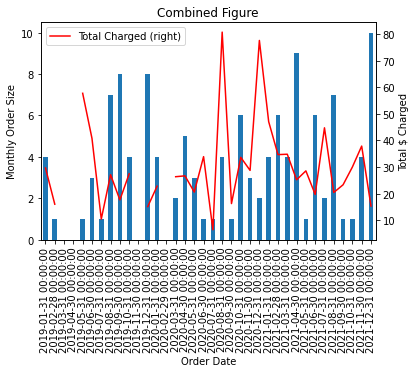

In [411]:
#Combined plot
ax = monthly_order_count.plot.bar(y='Total Charged', ylabel='Monthly Order Size')
monthly_mean.plot(legend=True,y='Total $ Charged', c='r',use_index=False, secondary_y=True, title='Combined Figure',rot=90)
ax.right_ax.set_ylabel('Total $ Charged')

<AxesSubplot:title={'center':'Delivery Method'}>

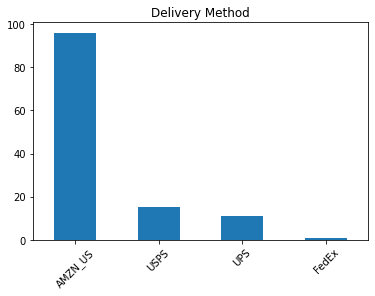

In [446]:
#strip out carrier and create col
df['Carrier'] = df['Carrier Name & Tracking Number'].str.split('(').str[0]

#create discrete val counts figure
df['Carrier'].value_counts().plot(kind='bar',title='Delivery Method',rot=45)

<AxesSubplot:title={'center':'Payment Card Type'}>

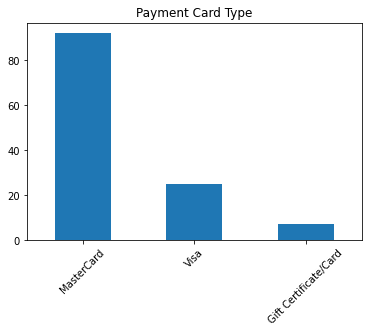

In [449]:
#strip out payment info string
df['Card Type'] = df['Payment Instrument Type'].str.split(' - ').str[0]

#create discrete val counts figure
df['Card Type'].value_counts().plot(kind='bar',title='Payment Card Type',rot=45)